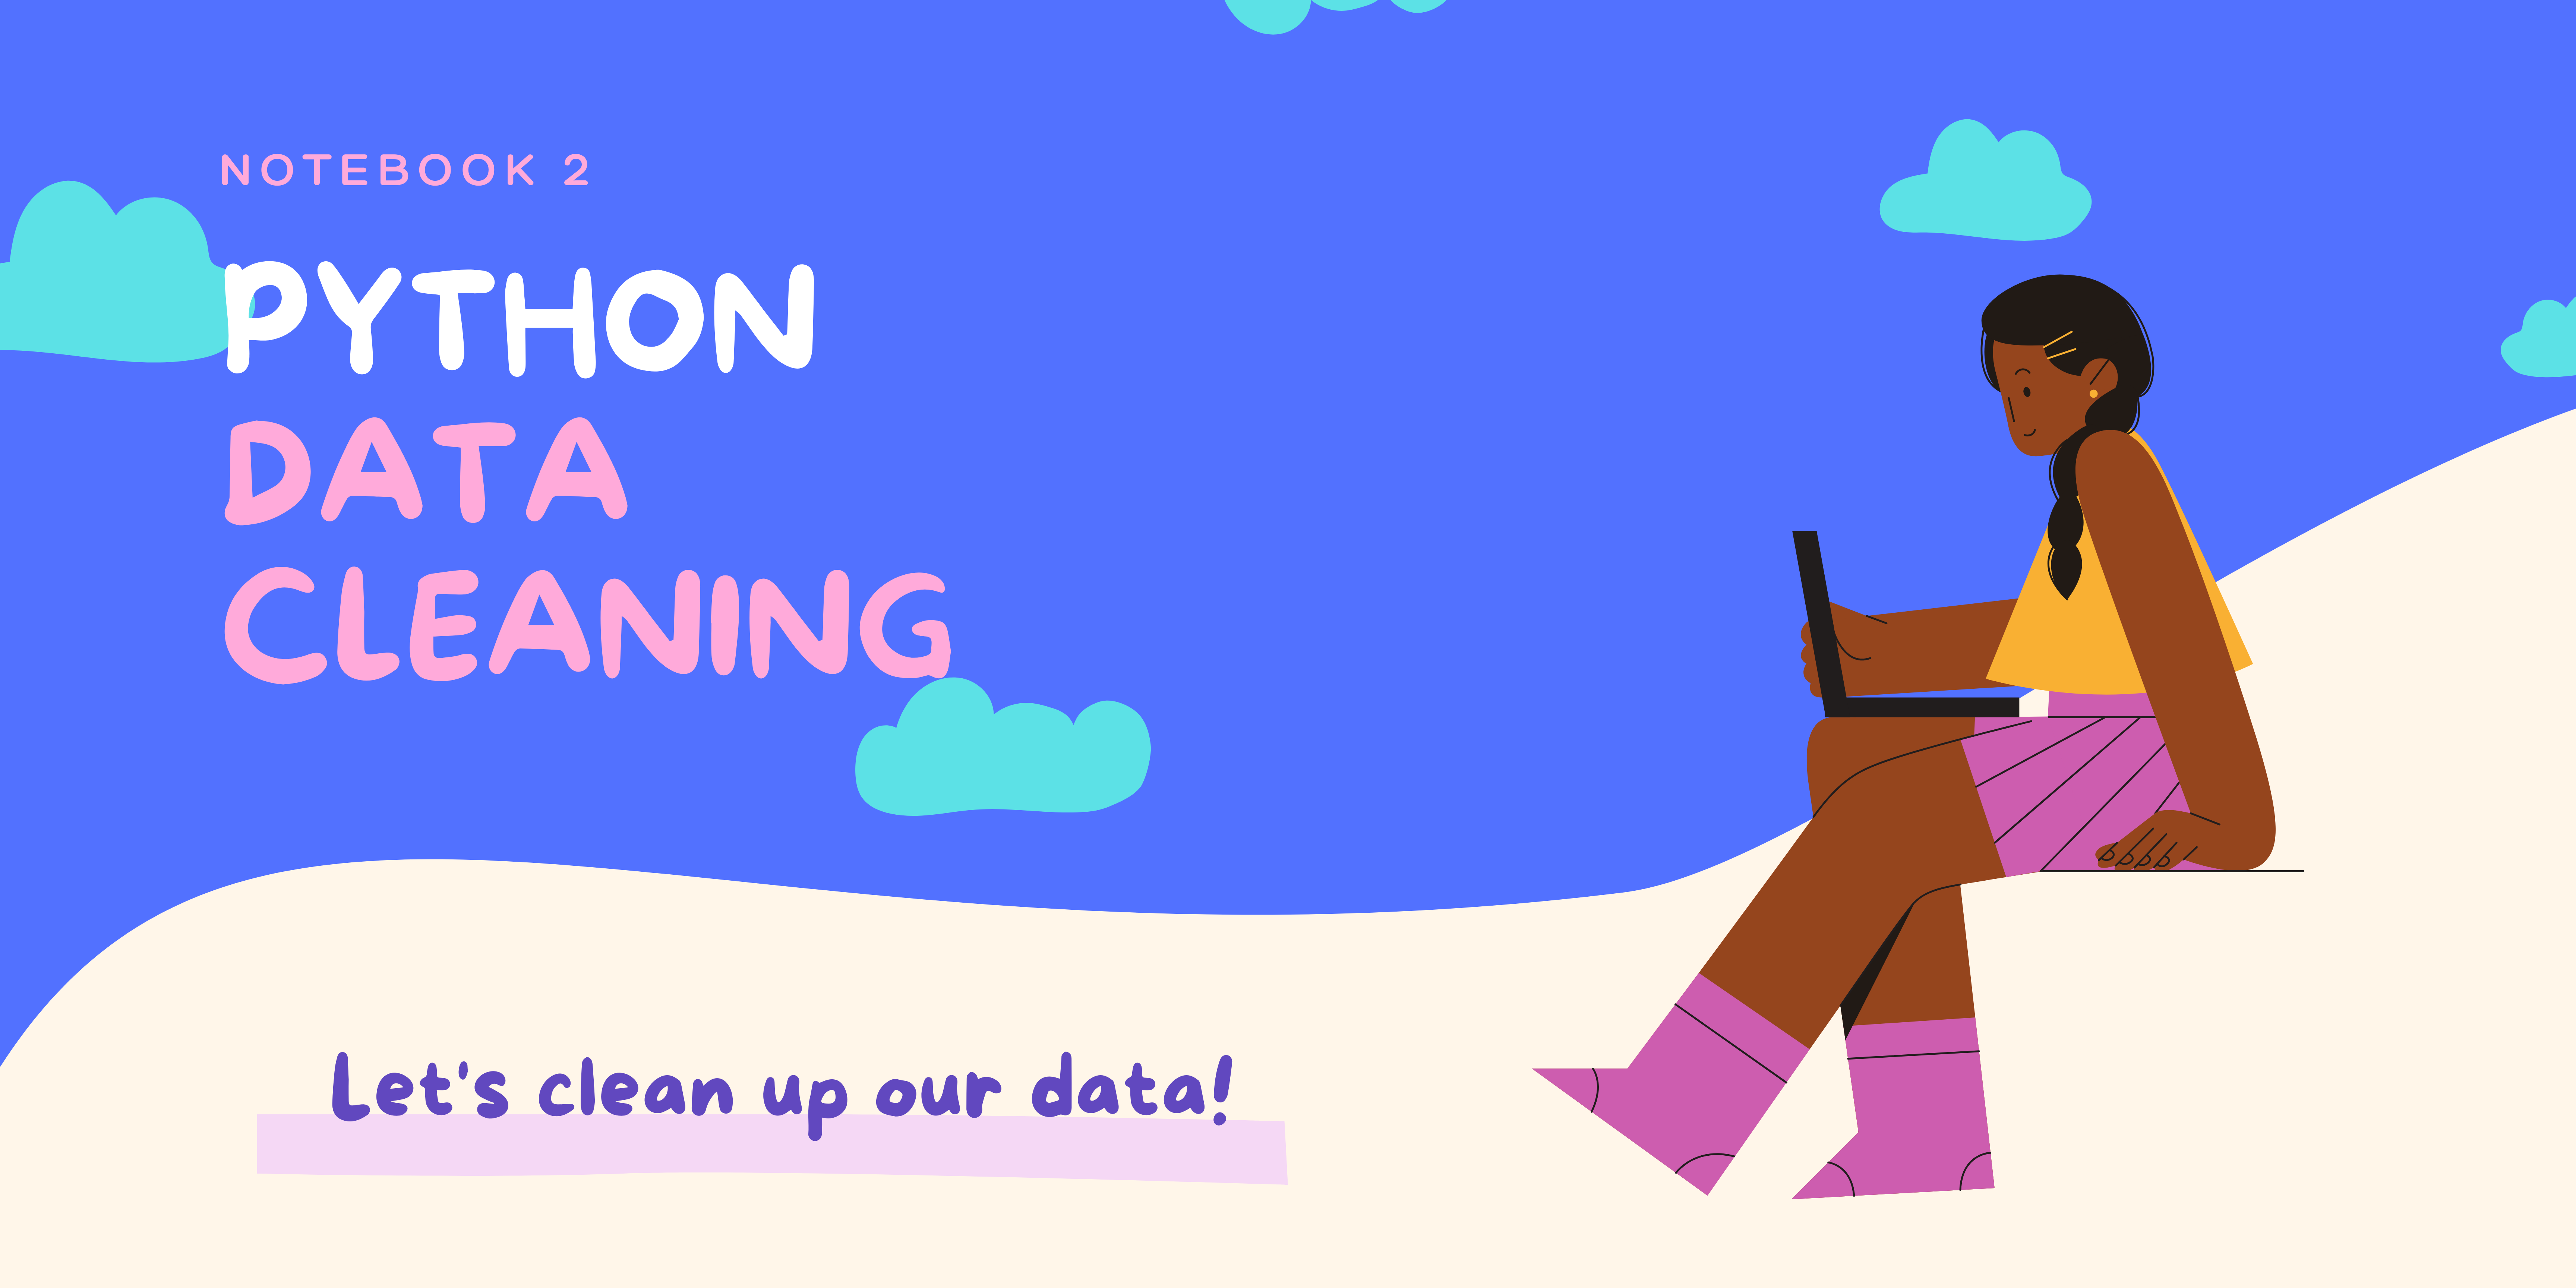

# Introduction

**What is data cleaning?**

Data cleaning is a process we use to make sure our data is ready to analyze. We want to 1) know how much missing data we have,  2) make decisions about who to exclude, 3) check that participants have valid data points.

**What data are we cleaning today?**

We will be continuing to use the dataset collected during the COVID-19 global pandemic. We used this data in the last tutorial covering[exploratory data analysis](https://medium.com/@ka741/exploratory-data-analysis-in-python-71c7a02c1407).
This data includes measures of social distancing and antisocial behavior. The original publication "[Reduced social distancing early in the COVID-19 pandemic is associated with antisocial behaviors in an online United States sample](https://pubmed.ncbi.nlm.nih.gov/33412567/)" covers this data in more detail and shares a [csv file](https://osf.io/4yp23/) for analysis.

**What question are we trying to answer?**

Did people that are more antisocial (i.e. people that break the rules and are more physically and socially aggressive) violate social distancing guidelines more during the pandemic?



---



## Setting Up the Notebook

### Import Libraries

In [1]:
import pandas as pd                   # data analysis and manipulation
import numpy as np                    # scientific computing

# data visualization
import seaborn as sns           

### Loading Data into the Notebook

1.   Click the file folder on the lefthand side of Google Colab notebook
2.   Now you should see a sheet of paper with an arrow pointing up. Click on this icon.
3.   Find the csv file on your local computer and select it for upload.



> NOTE: You will need to upload this file every time your session restarts. The data is not permanently loaded into your notebook.

### Transform the Data into a Pandas DataFrame



In [2]:
df = pd.read_csv("OConnell_COVID_MTurk.csv")

## Managing DataFrames

**How do I drop columns from my DataFrame?**<br>
We may already know there are columns we wont be using in our analysis. To make it easier for us to work with the data we can drop those columns. Let's say we know for sure we aren't looking into number of Covid-19 cases or population density.

In [3]:
df = df.drop(["loc_Density_Sq_Mile", "loc_Covid_Cases_april_1_2020"], axis=1)



Let's break down the line of code…

    

> df.drop([["loc_Density_Sq_Mile", "loc_Covid_Cases_april_1_2020"]<br>
First we call the pandas library drop method, .drop(), to remove columns from our DataFrame, df. Then we specify the columns we want to drop from our DataFrame.<br><br>
axis=1<br>
This is telling Pandas that we want to drop columns not rows. In order to do this, we specify the axis as 1. If we specified 0 it would search rows for the loc_Density_Sq_Mile and loc_Covid_Cases_april_1_2020 labels in order to drop those rows (which don't exist).

**How do I find the names of my columns?**<br>
To find the names on the columns you need you can use df.columns but sometimes this cuts off items. In order to keep this from happening you can save the column names into a list then print them in full.

In [4]:
col_list = list(df)
col_list

['subID',
 'mturk_randID',
 'suspect_itaysisso',
 'Country',
 'Region',
 'ISP',
 'loc_US',
 'loc_state',
 'loc_zipcode',
 'loc_County',
 'loc_2010population',
 'loc_Land_Sq_Mi',
 'attn1',
 'attn2',
 'attn3',
 'StartDate',
 'EndDate',
 'Duration',
 'worry_self',
 'likely_self',
 'health_self',
 'likely_lovedone',
 'health_lovedone',
 'worry_american',
 'likely_american',
 'health_american',
 'highrisk_self',
 'highrisk_lovedone',
 'highrisk_self_or_livewith',
 'financial_self',
 'financial_american',
 'wash_perday_actual',
 'wash_perday_ideal',
 'socialdistancing',
 'socialdistancing_for_me',
 'socialdistancing_for_close',
 'socialdistancing_for_americans',
 'socialdistancing_experience',
 'times_left_house_pastweek',
 'distance_from_others_feet_lastwe',
 'ppe_freq_lastweek',
 'times_left_house_for_vunerable_p',
 'think_about_pandemic_perday',
 'months_expect_gov_measures',
 'household_n_people',
 'symptoms',
 'symptoms_text',
 'silhouette_dist_X',
 'silhouette_dist_Y',
 'silhouette_dis

**What if I want to make a new DataFrame?**
If you only need a few variables to answer your question it's often easier to make the few needed columns into a new DataFrame.


To answer our question (Did antisocial people violate social distancing guidelines more during the global pandemic?) we need to think about the variables we might need. In this tutorial series we are going to look at a few different ways we can answer this question so below is a list of the columns we will need at some point in this series.

*   **times_left_house_pastweek**: This is a count of how many times someone left their house over the course of the previous week.
*   **STAB_physical**: This is a score from the STAB measuring how physically aggressive someone is.
*   **STAB_social**: This is a score from the STAB measuring how socially aggressive someone is.
*   **STAB_rulebreaking**: This is a score from the STAB measuring how much someone breaks the rules.
*   **silhouette_dist_X_inches**: How far participants placed the image of an adult silhouette from a marked point on the screen to represent how far away they typically stood from other individuals (example depiction below).





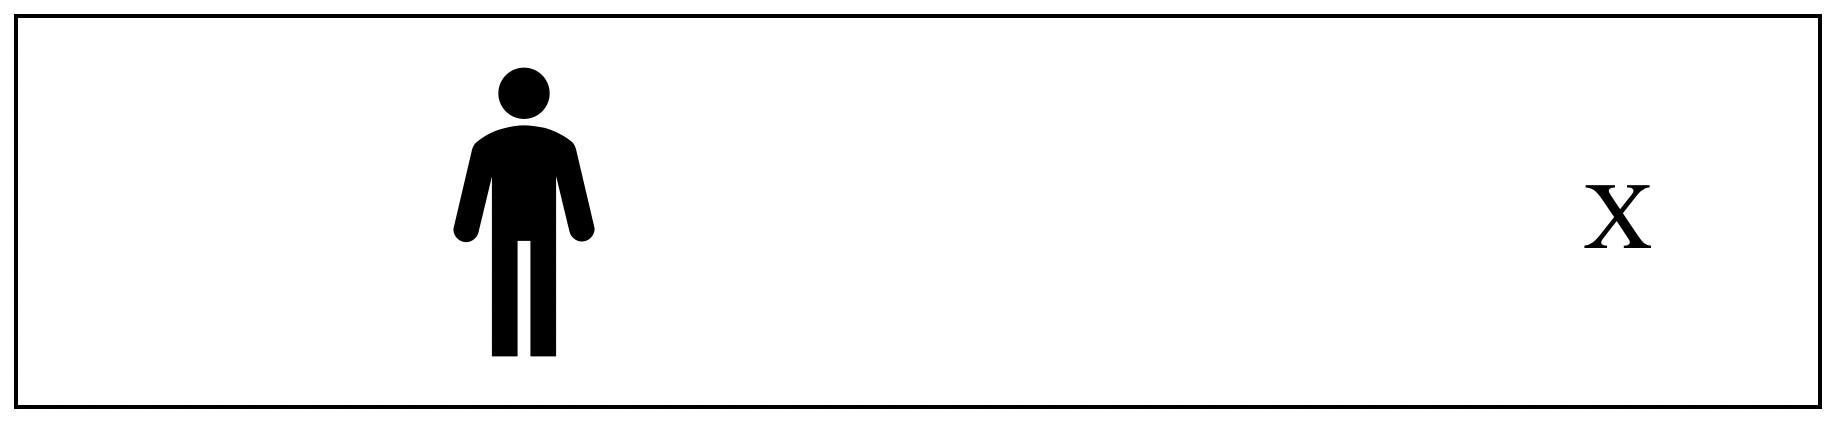

We will also need to control for some demographic variables like age and sex so we need to include those variables in our new DataFrame.

In [5]:
df_clean = df[["subID","STAB_physical","STAB_social","STAB_rulebreaking","times_left_house_pastweek","lefthouse_for_work_lastweek",
               "times_left_house_for_vunerable_p","silhouette_dist_X_inches","sex","age"]]



---



## Renaming Columns

We also may want to shorten or give column names that are more clear to us. Below let's rename some columns.

In [6]:
df_clean = df_clean.rename(columns={"times_left_house_pastweek": "times_left_house",
                                    "times_left_house_for_vunerable_p": "times_left_for_vulnerable"})


Let's break down the line of code… <br><br>
> We've gone over this kind of code before so what's new? Now we are using the **.rename()** method from pandas. This method takes a dictionary object inside of {} and uses it to rename our columns.<br><br> First we put the current name of the column, then after the : we put the new name we want to use.











---



## Dropping Duplicate Rows

Data can be messy so it's good to make sure you don't have any duplicate rows for participants. We can do this by dropping any rows with duplicated subject numbers.

In [7]:
df_clean = df_clean.drop_duplicates(subset="subID",keep="first")


> Let's break down the line of code… <br><br>
> We are using the **.drop_duplicates()** method to remove duplicated data. Then we are specifying that we want to drop only rows with duplicated subject IDs, **subset = "subID"**. Finally, we are specifying that we want to keep the first instance of the ID, **keep = "first"**.









---



## Dropping Missing Data

Next we can look and see how much missing data we have in a specific column. This will give us an idea of who may need to be excluded.





In [8]:
df_clean.isnull().sum()

subID                           0
STAB_physical                   0
STAB_social                     0
STAB_rulebreaking               0
times_left_house                0
lefthouse_for_work_lastweek     7
times_left_for_vulnerable       2
silhouette_dist_X_inches       10
sex                             0
age                             0
dtype: int64


> Let's break down the lines of code…<br><br>
> We are using the **.isnull()** method to find missing data. Then we are using the **.sum()** method to total the missing values in each column.







We can see from our output that there are a few participants missing data. Specifically, 7 people are missing times left the house for work, 2 are missing times left the house for a vulnerable population, and 10 are missing data on the silhouette distance.

Some analyses allow us to keep missing data points. For our purposes, in order to keep all the same participants across all analyses, we're going to make a new DataFrame that removes participants with any missing data.

In [9]:
df_clean = df_clean.dropna()
df_clean.count()

subID                          113
STAB_physical                  113
STAB_social                    113
STAB_rulebreaking              113
times_left_house               113
lefthouse_for_work_lastweek    113
times_left_for_vulnerable      113
silhouette_dist_X_inches       113
sex                            113
age                            113
dtype: int64

Now we have a new DataFrame with only complete data on our variables of interest.



---



## Detecting Outliers

Outliers are data points that are very different from all other data-points in the sample.<br><br>
Box plots are a helpful way to visualize distributions of data and find outliers. The shaded box includes everyone that scores from the 25th to the 75th percentile, meaning the middle ~50% of the data. The lines on either side include the highest and lowest scores meaning, the top and bottom ~25% of the data. Sometimes participants will fall outside of the top and bottom ~25% lines. These participants are often considered outliers.<br><br>
We want to be thoughtful when dealing with outliers. The only reason we would remove an outlier is if it's an impossible score. For example, if someone reports their age as 200. So let's take a look at an example in thedata and make sure all scores are valid.

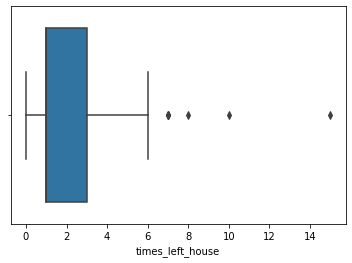

In [10]:
sns.boxplot(x=df_clean["times_left_house"])

Let's break down the lines of code…


> We are importing **.boxplot()** method from the seaborn (**sns**) library. We then specify to use the **df_clean** DataFrame **"times_left_house"** variable.



We can see that there are 4 data-points, people that are leaving their house 7–15 times per week, that could be considered outliers. These aren't impossible values and these participants may provide valuable information as to why people are leaving their house so often. We don't want to delete this data just because they score higher than everyone else in our data-set.<br><br>
You should always check the variables in your DataFrame to make sure there aren't any unrealistic values. There are no unrealistic values in the data we are working with so we can move onto the next step.



---



## Save the New Clean Data

This will vary depending on the notebook environment you are using. Here I will cover how to save and download the cleaned DataFrame to a csv using Google Colab.

In [11]:
from google.colab import files
df_clean.to_csv("df_clean.csv")
files.download("df_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's break down the lines of code…


> We're importing the **files** group of methods from the **google.colab** library that will help us manage files. We then specifically use the **.to_csv()** method to convert our **df_clean** DataFrame into a cvs called **df_clean.csv**. Finally, we download the csv file, **df_clean.csv**, using the file.download() method.



Now you've cleaned your data are are one step closer to answering the question: Did people that are more antisocial violate social distancing guidelines more during the pandemic?